## Figures for Sample Reach

In [1]:
## Load participant 7 (will be our sample)
import numpy as np

participantNumber = 7

endOfFileName = "_" + str(participantNumber) + ".npy"
resultsNF1 = np.load("save_NF1/cartesian_position" + endOfFileName)
targetsNF1 = np.load("save_NF1/targets" + endOfFileName)
resultsCF1 = np.load("save_CF1/cartesian_position" + endOfFileName)
targetsCF1 = np.load("save_CF1/targets" + endOfFileName)
resultsNF2 = np.load("save_NF2/cartesian_position" + endOfFileName)
targetsNF2 = np.load("save_NF2/targets" + endOfFileName)
resultsCF2 = np.load("save_CF2/cartesian_position" + endOfFileName)
targetsCF2 = np.load("save_CF2/targets" + endOfFileName)

In [2]:
import matplotlib.pyplot as plt

def plotReaches(xy, target_xy, title):
    plt.figure(figsize=(2.5, 2.5)).set_tight_layout(True)
    target_x = target_xy[:, -1, 0]
    target_y = target_xy[:, -1, 1]
    for i in range(8):
        plt.plot(target_xy[i,:,0],target_xy[i,:,1],color="r",linewidth=0.5) ## target straight line reach
        plt.plot(xy[i,:,0],xy[i,:,1],color="b",linewidth=1.0) ## actual reach
    plt.scatter(target_x, target_y)
    plt.axis([-0.15, 0.15, 0.3, 0.6])
    plt.xlabel("X (m)")
    plt.ylabel("Y (m)")
    plt.title(title)
    saveLocation = "figures/" + title + ".png"
    plt.savefig(saveLocation)


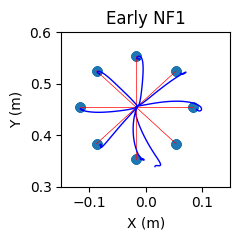

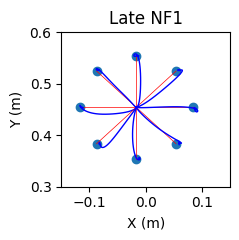

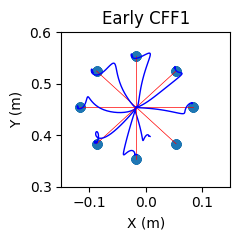

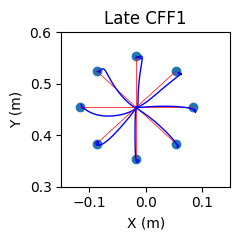

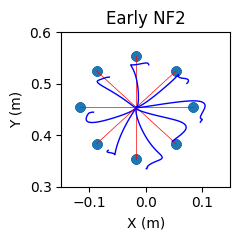

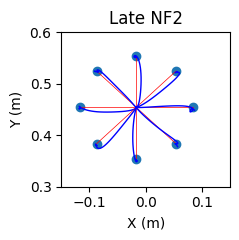

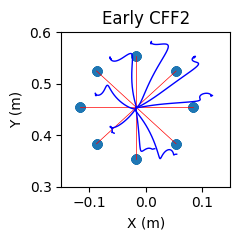

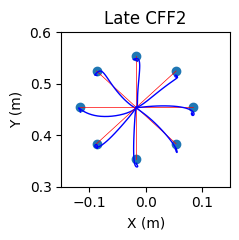

In [3]:
## Looking at NF1

## NF1
plotReaches(resultsNF1[7:, :, :], targetsNF1[7:, :, :], "Early NF1")
plotReaches(resultsNF1[-8:, :, :], targetsNF1[-8:, :, :], "Late NF1")

## CF1
plotReaches(resultsCF1[7:, :, :], targetsCF1[7:, :, :], "Early CFF1")
plotReaches(resultsCF1[-8:, :, :], targetsCF1[-8:, :, :], "Late CFF1")

## NF2
plotReaches(resultsNF2[7:, :, :], targetsNF2[7:, :, :], "Early NF2")
plotReaches(resultsNF2[-8:, :, :], targetsNF2[-8:, :, :], "Late NF2")

## CF2
plotReaches(resultsCF2[7:, :, :], targetsCF2[7:, :, :], "Early CFF2")
plotReaches(resultsCF2[-8:, :, :], targetsCF2[-8:, :, :], "Late CFF2")

## Figures for max deviation

In [4]:
import numpy as np

maxNF1 = np.load("postAnalysis/maxNF1.npy")
maxCF1 = np.load("postAnalysis/maxCF1.npy")
maxNF2 = np.load("postAnalysis/maxNF2.npy")
maxCF2 = np.load("postAnalysis/maxCF2.npy")
# parametersPerParticipantNF1 = np.load("postAnalysis/funcParametersNF1.npy")
# parametersPerParticipantCF1 = np.load("postAnalysis/funcParametersCF1.npy")
# parametersPerParticipantNF2 = np.load("postAnalysis/funcParametersNF2.npy")
# parametersPerParticipantCF2 = np.load("postAnalysis/funcParametersCF2.npy")

# parametersPerParticipantNF1 = parametersPerParticipantNF1[1:,:]
# parametersPerParticipantCF1 = parametersPerParticipantCF1[1:, :]
# parametersPerParticipantNF2 = parametersPerParticipantNF2[1:, :]
# parametersPerParticipantCF2 = parametersPerParticipantCF2[1:, :]

In [66]:
from scipy.optimize import curve_fit

def printLearningCurves(monoExp, currMaxNF1, currMaxCF1, currMaxNF2, currMaxCF2, saveLocation):

    initialGuess = [0.03, 0.01, 0.01]

    # PLOTTING MAX
    plt.figure(figsize=(10, 2.3)).set_tight_layout(True)

    plt.subplot(141)
    plt.scatter(range(len(currMaxNF1)), currMaxNF1, s=3, color="grey")
    polyline = np.linspace(0, len(currMaxNF1), len(currMaxNF1))
    opt_params, param_cov = curve_fit(monoExp, polyline, currMaxNF1, p0=initialGuess)
    print(opt_params)
    A, K, C = opt_params
    fit_y = monoExp(polyline, A, K, C)
    plt.plot(polyline, fit_y, "-", color="b",linewidth=3)
    plt.title('NF1')
    plt.xlabel("Trial")
    plt.ylabel("Max deviation (m)")
    plt.axis([-10, 410, 0, 0.08])

    plt.subplot(142)
    plt.scatter(range(len(currMaxCF1)), currMaxCF1, s=3, color="grey")
    polyline = np.linspace(0, len(currMaxCF1), len(currMaxCF1))
    opt_params, param_cov = curve_fit(monoExp, polyline, currMaxCF1, p0=initialGuess)
    print(opt_params)
    A, K, C = opt_params
    fit_y = monoExp(polyline, A, K, C)
    plt.plot(polyline, fit_y, "-", color="b",linewidth=3)
    plt.title('CFF1')
    plt.xlabel("Trial")
    plt.ylabel("Max deviation (m)")
    plt.axis([-10, 410, 0, 0.08])

    plt.subplot(143)
    plt.scatter(range(len(currMaxNF2)), currMaxNF2, s=3, color="grey")
    polyline = np.linspace(0, len(currMaxNF2), len(currMaxNF2))
    opt_params, param_cov = curve_fit(monoExp, polyline, currMaxNF2, p0=initialGuess)
    print(opt_params)
    A, K, C = opt_params
    fit_y = monoExp(polyline, A, K, C)
    plt.plot(polyline, fit_y, "-", color="b",linewidth=3)
    plt.title('NF2')
    plt.xlabel("Trial")
    plt.ylabel("Max deviation (m)")
    plt.axis([-10, 410, 0, 0.08])

    plt.subplot(144)
    plt.scatter(range(len(currMaxCF2)), currMaxCF2, s=3, color="grey")
    polyline = np.linspace(0, len(currMaxCF2), len(currMaxCF2))
    opt_params, param_cov = curve_fit(monoExp, polyline, currMaxCF2, p0=initialGuess)
    print(opt_params)
    A, K, C = opt_params
    fit_y = monoExp(polyline, A, K, C)
    plt.plot(polyline, fit_y, "-", color="b",linewidth=3)
    plt.title('CFF2')
    plt.xlabel("Trial")
    plt.ylabel("Max deviation (m)")
    plt.axis([-10, 410, 0, 0.08])

    plt.savefig(saveLocation)

[0.02546957 0.02465628 0.00940496]
[0.02839455 0.01177411 0.00969193]
[0.02563556 0.01260644 0.00784753]
[0.0248185  0.01032561 0.00882289]


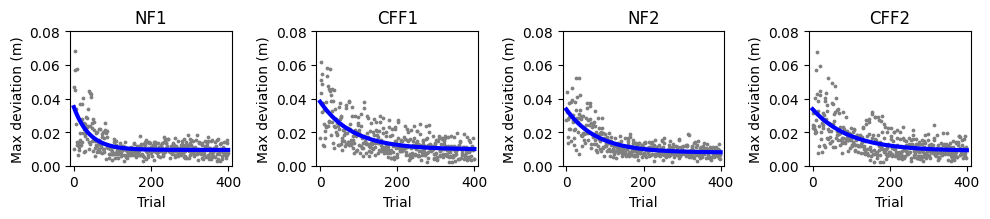

In [67]:
currMaxNF1 = maxNF1[7, :]
currMaxCF1 = maxCF1[7, :]
currMaxNF2 = maxNF2[7, :]
currMaxCF2 = maxCF2[7, :]

def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

saveLocation = "figures/maxDeviationCurves7"

printLearningCurves(monoExp, currMaxNF1, currMaxCF1, currMaxNF2, currMaxCF2, saveLocation)

## Figures for comparing first 5% (initial performance)

In [19]:
# extract first 5% for each curve
import numpy as np

initialMaxNF1 = maxNF1[:, 0:20]
initialMaxCF1 = maxCF1[:, 0:20]
initialMaxNF2 = maxNF2[:, 0:20]
initialMaxCF2 = maxCF2[:, 0:20]

initialPerParticipantNF1 = np.mean(initialMaxNF1, axis=0)
initialPerParticipantCF1 = np.mean(initialMaxCF1, axis=0)
initialPerParticipantNF2 = np.mean(initialMaxNF2, axis=0)
initialPerParticipantCF2 = np.mean(initialMaxCF2, axis=0)

# avgMaxNF1 = np.mean(initialMaxNF1) # averaging the first 20 trials for each participant, and averaging all participants
# avgMaxCF1 = np.mean(initialMaxCF1) 
# avgMaxNF2 = np.mean(initialMaxNF2) 
# avgMaxCF2 = np.mean(initialMaxCF2) 

avgMaxNF1 = np.mean(initialPerParticipantNF1) # averaging the first 20 trials for each participant, and averaging all participants
avgMaxCF1 = np.mean(initialPerParticipantCF1) 
avgMaxNF2 = np.mean(initialPerParticipantNF2) 
avgMaxCF2 = np.mean(initialPerParticipantCF2) 


In [20]:
# test significance
from scipy.stats import ttest_rel

t_statistic, p_value = ttest_rel(initialPerParticipantNF1, initialPerParticipantNF2)
print("NF T Statistic: ", t_statistic) # -2.41
print("NF P value: ", p_value) # 0.026
# there is a significant difference in initial performance between NF1 and NF2 (p < 0.05)


t_statistic, p_value = ttest_rel(initialPerParticipantCF1, initialPerParticipantCF2)
print("CFF T Statistic: ",t_statistic) # 3.26
print("CFF P value: ", p_value) # 0.0041
# there is a significant difference between CF1 and CF2 (p < 0.01)

NF T Statistic:  -2.407898958923025
NF P value:  0.02636803645373082
CFF T Statistic:  3.2567780177992076
CFF P value:  0.00415000759588266


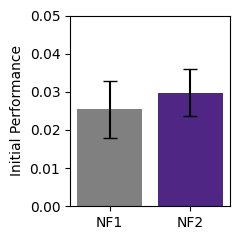

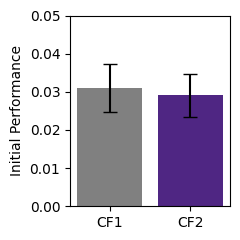

In [29]:
import matplotlib.pyplot as plt

colors = ["grey", "#4F2683"]

plt.figure(figsize=(2.5, 2.5)).set_tight_layout(True)
x_axis = ['NF1', 'NF2']
y_axis = [avgMaxNF1, avgMaxNF2]
yerror = [np.std(initialPerParticipantNF1), np.std(initialPerParticipantNF2)]
plt.bar(x_axis, y_axis, color=colors, yerr = yerror, capsize=5)
plt.ylabel("Initial Performance")
plt.ylim([0, 0.05])
plt.savefig("figures/initialNFbar")

plt.figure(figsize=(2.5, 2.5)).set_tight_layout(True)
x_axis = ['CF1', 'CF2']
y_axis = [avgMaxCF1, avgMaxCF2]
yerror = [np.std(initialPerParticipantCF1), np.std(initialPerParticipantCF2)]
plt.bar(x_axis, y_axis, color=colors, yerr = yerror, capsize=5)
plt.ylabel("Initial Performance")
plt.ylim([0, 0.05])
plt.savefig("figures/initialCFFbar")

## Figures for comparing learning rate

In [22]:
parametersPerParticipantNF1 = np.load("postAnalysis/funcParametersNF1.npy")
parametersPerParticipantCF1 = np.load("postAnalysis/funcParametersCF1.npy")
parametersPerParticipantNF2 = np.load("postAnalysis/funcParametersNF2.npy")
parametersPerParticipantCF2 = np.load("postAnalysis/funcParametersCF2.npy")

ratePerParticipantNF1 = parametersPerParticipantNF1[1:,1]
ratePerParticipantCF1 = parametersPerParticipantCF1[1:, 1]
ratePerParticipantNF2 = parametersPerParticipantNF2[1:, 1]
ratePerParticipantCF2 = parametersPerParticipantCF2[1:, 1]

avgRateNF1 = np.mean(ratePerParticipantNF1)
avgRateCF1 = np.mean(ratePerParticipantCF1)
avgRateNF2 = np.mean(ratePerParticipantNF2)
avgRateCF2 = np.mean(ratePerParticipantCF2)

In [23]:
# test significance
from scipy.stats import ttest_rel

t_statistic, p_value = ttest_rel(ratePerParticipantNF1, ratePerParticipantNF2)
print("NF T Statistic: ", t_statistic) # 2.81
print("NF P value: ", p_value) # 0.011
# there is a significant difference in rate of learning between NF1 and NF2 (p < 0.05)

t_statistic, p_value = ttest_rel(ratePerParticipantCF1, ratePerParticipantCF2)
print("CFF T Statistic: ",t_statistic) # -0.67
print("CFF P value: ", p_value) # 0.51
# there is no significant difference in rate of learning between CF1 and CF2 (p > 0.05)

NF T Statistic:  2.8069488818566235
NF P value:  0.011251992790049787
CFF T Statistic:  -0.6732145354997674
CFF P value:  0.5089174958238418


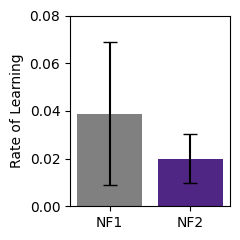

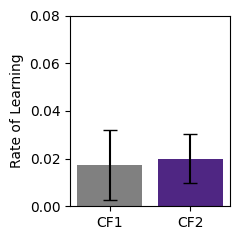

In [27]:
import matplotlib.pyplot as plt

colors = ["grey", "#4F2683"]

plt.figure(figsize=(2.5, 2.5)).set_tight_layout(True)
x_axis = ['NF1', 'NF2']
y_axis = [avgRateNF1, avgRateNF2]
yerror = [np.std(ratePerParticipantNF1), np.std(ratePerParticipantNF2)]
plt.bar(x_axis, y_axis, color=colors, yerr = yerror, capsize=5)
plt.ylabel("Rate of Learning")
plt.ylim([0, 0.08])
plt.savefig("figures/rateNFbar")

plt.figure(figsize=(2.5, 2.5)).set_tight_layout(True)
x_axis = ['CF1', 'CF2']
y_axis = [avgRateCF1, avgRateCF2]
yerror = [np.std(ratePerParticipantCF1), np.std(ratePerParticipantCF2)]
plt.bar(x_axis, y_axis, color=colors, yerr = yerror, capsize=5)
plt.ylabel("Rate of Learning")
plt.ylim([0, 0.08])
plt.savefig("figures/rateCFFbar")

## Figures for comparing final asymptotic deviation (final 5%)

In [5]:
# extract first 5% for each curve
import numpy as np

finalMaxNF1 = maxNF1[:, -20:]
finalMaxCF1 = maxCF1[:, -20:]
finalMaxNF2 = maxNF2[:, -20:]
finalMaxCF2 = maxCF2[:, -20:]

finalPerParticipantNF1 = np.mean(finalMaxNF1, axis=0)
finalPerParticipantCF1 = np.mean(finalMaxCF1, axis=0)
finalPerParticipantNF2 = np.mean(finalMaxNF2, axis=0)
finalPerParticipantCF2 = np.mean(finalMaxCF2, axis=0)

# avgMaxNF1 = np.mean(initialMaxNF1) # averaging the first 20 trials for each participant, and averaging all participants
# avgMaxCF1 = np.mean(initialMaxCF1) 
# avgMaxNF2 = np.mean(initialMaxNF2) 
# avgMaxCF2 = np.mean(initialMaxCF2) 

avgMaxNF1 = np.mean(finalPerParticipantNF1) # averaging the first 20 trials for each participant, and averaging all participants
avgMaxCF1 = np.mean(finalPerParticipantCF1) 
avgMaxNF2 = np.mean(finalPerParticipantNF2) 
avgMaxCF2 = np.mean(finalPerParticipantCF2) 

In [6]:
# test significance
from scipy.stats import ttest_rel

t_statistic, p_value = ttest_rel(finalPerParticipantNF1, finalPerParticipantNF2)
print("NF T Statistic: ", t_statistic) # 0.42
print("NF P value: ", p_value) # 0.68
# there is no significant difference in initial performance between NF1 and NF2 (p > 0.05)


t_statistic, p_value = ttest_rel(finalPerParticipantCF1, finalPerParticipantCF2)
print("CFF T Statistic: ",t_statistic) # 2.85
print("CFF P value: ", p_value) # 0.01
# there is a significant difference between CF1 and CF2 (p < 0.05)

NF T Statistic:  0.4232329671553651
NF P value:  0.676877359555331
CFF T Statistic:  2.8466328329035253
CFF P value:  0.010317993294195795


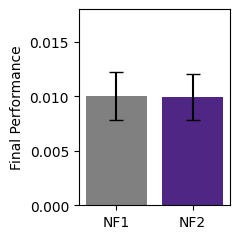

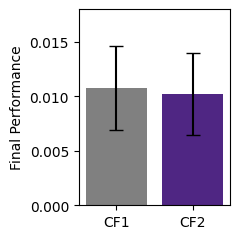

In [17]:
import matplotlib.pyplot as plt

colors = ["grey", "#4F2683"]

plt.figure(figsize=(2.5, 2.5)).set_tight_layout(True)
x_axis = ['NF1', 'NF2']
y_axis = [avgMaxNF1, avgMaxNF2]
yerror = [np.std(finalPerParticipantNF1), np.std(finalPerParticipantNF2)]
plt.bar(x_axis, y_axis, color=colors, yerr = yerror, capsize=5)
#plt.errorbar(x_axis, y_axis, yerror)
plt.ylabel("Final Performance")
plt.ylim([0, 0.018])
plt.savefig("figures/finalNFbar")

plt.figure(figsize=(2.5, 2.5)).set_tight_layout(True)
x_axis = ['CF1', 'CF2']
y_axis = [avgMaxCF1, avgMaxCF2]
yerror = [np.std(finalPerParticipantCF1), np.std(finalPerParticipantCF2)]
plt.bar(x_axis, y_axis, color=colors, yerr = yerror, capsize=5)
plt.ylabel("Final Performance")
plt.ylim([0, 0.018])
plt.savefig("figures/finalCFFbar")